In [1]:
def direct2FormModel(data, a1, a2, b0, b1, b2):
    from numpy import zeros, arange
    
    result = zeros((len(data),))
    timeZone = zeros((len(data),))
    
    for n in arange(2, len(data)):
        sum0 = -a1*timeZone[n-1] - a2*timeZone[n-2]
        timeZone[n] = data[n] + sum0
        result[n] = b0*timeZone[n] + b1*timeZone[n-1] + b2*timeZone[n-2]
        
    return result

In [2]:
def toHz(value):
    from numpy import pi
    return value/2/pi

In [3]:
def draw_FFT_Graph(data, fs, **kwargs):
    from numpy.fft import fft
    import matplotlib.pyplot as plt
    
    graphStyle = kwargs.get('style', 0)
    xlim = kwargs.get('xlim', 0)
    ylim = kwargs.get('ylim', 0)
    title = kwargs.get('title', 'FFT result')
    
    n = len(data)
    k = np.arange(n)
    T = n/Fs
    freq = k/T 
    freq = freq[range(int(n/2))]
    FFT_data = fft(data)/n 
    FFT_data = FFT_data[range(int(n/2))]
    
    plt.figure(figsize=(12,5))
    if graphStyle == 0:
        plt.plot(freq, abs(FFT_data), 'r', linestyle=' ', marker='^') 
    else:
        plt.plot(freq,abs(FFT_data),'r')
    plt.xlabel('Freq (Hz)')
    plt.ylabel('|Y(freq)|')
    plt.vlines(freq, [0], abs(FFT_data))
    plt.title(title)
    plt.grid(True)
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()

In [43]:
def getBPFCoeffi(f_peak, bandWidth, Ts):
    from numpy import pi
    
    w0_peak = 2*np.pi*f_peak
    
    Q = f_peak/bandWidth
    H = 1/w0_peak
    H0 = H/Q
    
    b0_ = 2*H0*w0_peak**2/Ts
    b1_ = 0
    b2_ = -2*H0*w0_peak**2/Ts
    
    a0_ = 4/Ts**2+2*w0_peak/Q/Ts+w0_peak**2
    a1_ = -8/Ts**2+2*w0_peak**2
    a2_ = 4/Ts**2-2*w0_peak/Q/Ts+w0_peak**2
    
    return a1_/a0_, a2_/a0_, b0_/a0_, b1_/a0_, b2_/a0_

In [5]:
import scipy.signal as sig
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [68]:
# Band Pass Filter in Continuous Time
f_peak = 1000
w0_peak = 2*np.pi*f_peak
bandWidth = 400
Q = f_peak/bandWidth
H = 1/w0_peak
H0 = H/Q

num = np.array([H0*w0_peak**2, 0])
den = np.array([1, w0_peak/Q, w0_peak**2])

s = sig.lti(num, den)
w, m, p = sig.bode(s, n=10000)

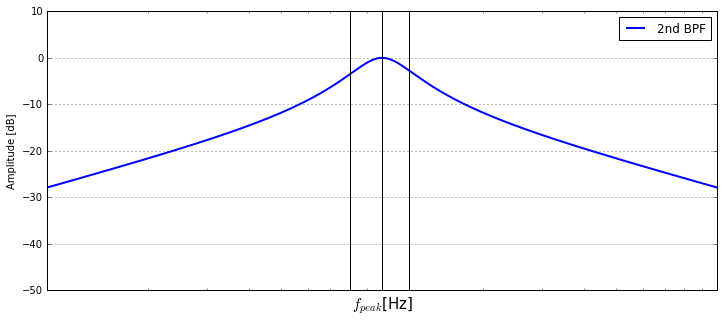

In [69]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w), m, lw=2, label='2nd BPF')
plt.axvline(f_peak+bandWidth/2, color='k', lw=1)
plt.axvline(f_peak, color='k', lw=1)
plt.axvline(f_peak-bandWidth/2, color='k', lw=1)
plt.xlim(10**2, 10**4)
plt.ylim(-50, 10)
plt.ylabel('Amplitude [dB]')
plt.xticks([f_peak+bandWidth/2, f_peak, f_peak-bandWidth/2], ('','$f_{peak}$[Hz]',''), fontsize = 15)
plt.legend()
plt.grid()
plt.show()

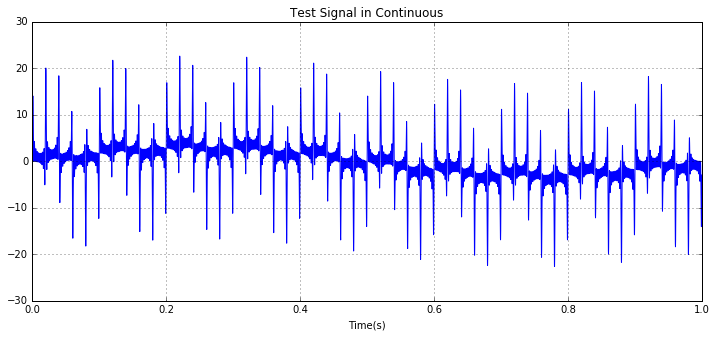

In [46]:
# Create Test Signal
Fs = 10*10**3               # 10kHz
Ts = 1/Fs                   # sample Time
endTime = 1
t = np.arange(0.0, endTime, Ts)

inputSig = 3.*np.sin(2.*np.pi*t)

sampleFreq = np.arange(10,500,50)

for freq in sampleFreq:
    inputSig = inputSig + 2*np.sin(2*np.pi*freq*t)
    
plt.figure(figsize=(12,5))
plt.plot(t, inputSig)
plt.xlabel('Time(s)')
plt.title('Test Signal in Continuous')
plt.grid(True)
plt.show()

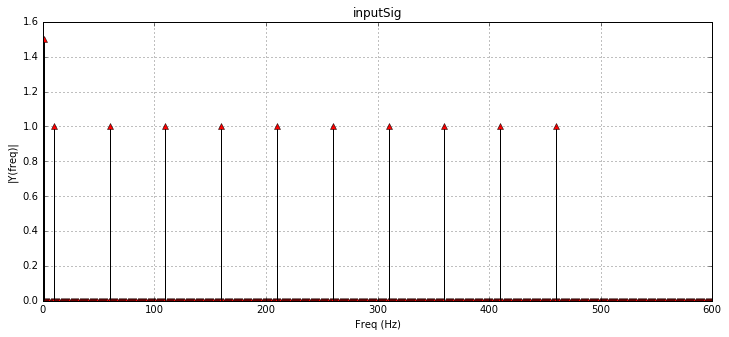

In [47]:
draw_FFT_Graph(inputSig, Fs, title='inputSig', xlim=(0, 600))

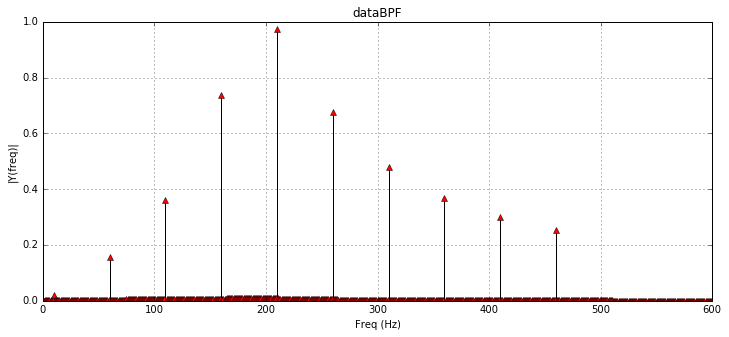

In [48]:
a1, a2, b0, b1, b2 = getBPFCoeffi(200, 100, Ts)
dataBPF = direct2FormModel(inputSig, a1, a2, b0, b1, b2)
draw_FFT_Graph(dataBPF, Fs, title='dataBPF', xlim=(0, 600))

In [76]:
# Band Stop Filter in Continuous Time
f_peak = 1000
w0_peak = 2*np.pi*f_peak
bandWidth = 400
Q = f_peak/bandWidth
H0 = 1

num = np.array([H0,0,H0*w0_peak**2])
den = np.array([1, w0_peak/Q, w0_peak**2])

s = sig.lti(num, den)
w, m, p = sig.bode(s, n=10000)

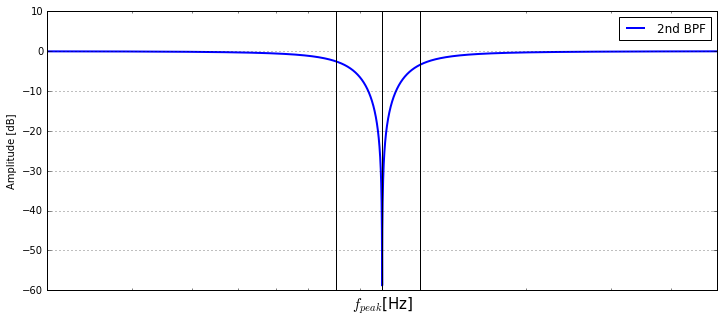

In [77]:
plt.figure(figsize=(12,5))
plt.semilogx(toHz(w), m, lw=2, label='2nd BPF')
plt.axvline(f_peak+bandWidth/2, color='k', lw=1)
plt.axvline(f_peak, color='k', lw=1)
plt.axvline(f_peak-bandWidth/2, color='k', lw=1)
plt.xlim(2*10**2, 5000)
plt.ylim(-60, 10)
plt.ylabel('Amplitude [dB]')
plt.xticks([f_peak+bandWidth/2, f_peak, f_peak-bandWidth/2], ('','$f_{peak}$[Hz]',''), fontsize = 15)
plt.legend()
plt.grid()
plt.show()

In [66]:
def getBSFCoeffi(f_peak, bandWidth, Ts):
    from numpy import pi
    
    w0_peak = 2*np.pi*f_peak
    Q = f_peak/bandWidth
    H0 = 1
    
    b0_ = H0*4/Ts**2 + H0*w0_peak**2
    b1_ = -2*H0*4/Ts**2 + 2*w0_peak**2
    b2_ = H0*4/Ts**2 + H0*w0_peak**2
    
    a0_ = 4/Ts**2+2*w0_peak/Q/Ts+w0_peak**2
    a1_ = -8/Ts**2+2*w0_peak**2
    a2_ = 4/Ts**2-2*w0_peak/Q/Ts+w0_peak**2
    
    return a1_/a0_, a2_/a0_, b0_/a0_, b1_/a0_, b2_/a0_

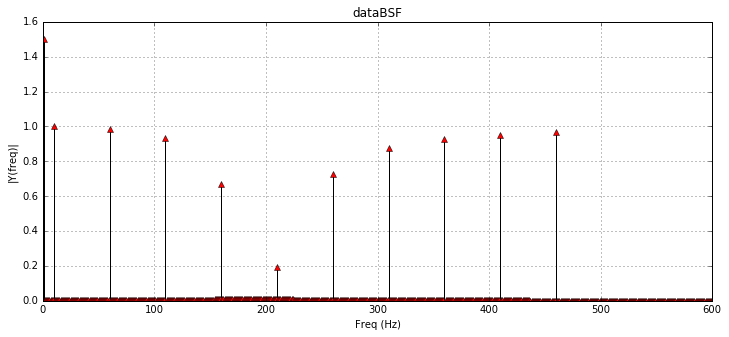

In [67]:
a1, a2, b0, b1, b2 = getBSFCoeffi(200, 100, Ts)
dataBSF = direct2FormModel(inputSig, a1, a2, b0, b1, b2)
draw_FFT_Graph(dataBSF, Fs, title='dataBSF', xlim=(0, 600))